## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv("banknotes.csv")
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


用pd.read_csv讀取檔案

In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here

data_xy = np.array(bank[["Bottom","Top"]])
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

用np.array把兩筆資料(top,bottom)另外合併

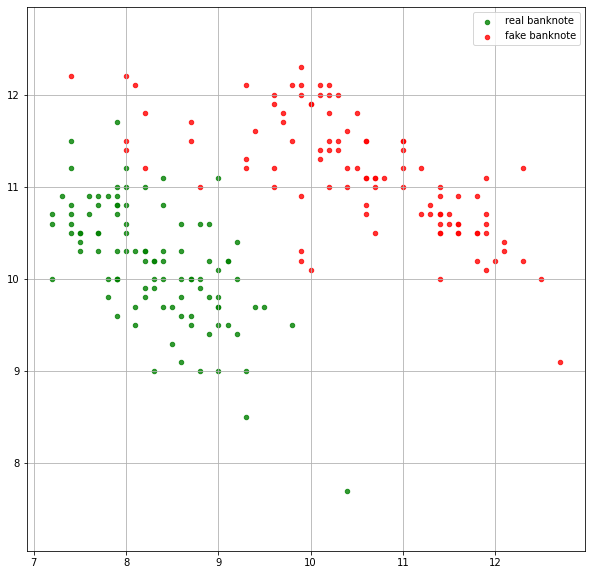

In [4]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.array(np.where(label==0))
#傳回符合label=0的index值
index_1 = np.array(np.where(label==1))
#傳回符合label=1的index值

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
#label=0的用綠色，label=1的用紅色
#(data_xy[index_0,0],data_xy[index_0,1])&(data_xy[index_1,0],data_xy[index_1,1])即為每個點的xy座標
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],c="green",s=20, alpha=0.8)
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],c="red",s=20, alpha=0.8)
#加上圖例，位置設定在右上
plt.legend(labels=["real banknote","fake banknote"],loc="upper right")
#加上網格
plt.grid()
#讓兩邊的軸相同的長度
plt.axis("equal")
plt.show()

In [5]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here
#令dist_sq為一個list
dist_sq = []
#計算任兩點之間的距離(包含自己跟自己)，四捨五入到小數第二位，append到dist_sq裡面
for i in range(len(data_xy)):
    for j in range(len(data_xy)):
        dist_sq.append((np.sum(np.square(data_xy[i]-data_xy[j]))).round(2))
#把dist_sq轉乘np，然後把矩陣的行列都改成data_xy的長度
dist_sq = np.array(dist_sq).reshape(len(data_xy),len(data_xy))

In [6]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [7]:
def nearest_partition(dist_sq, K):
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    new=[]
    distance={}
    #在dist_sq的每一個row裡面取前K小的距離的"index"，append到new裡面
    for t in range(len(dist_sq)):
        new.append(np.argpartition(dist_sq[t].ravel(), K+1)[:K+1])
    #new裡面存的是index
    new=np.array(new)
    #如果行數(i)等於new裡面的index(j)，代表那個點是自己，就忽略不計，如果不是就把點座標append到closedist裡面
    for i in range(len(data_xy)):
        closedist=[]
        for j in new[i]:
            if i == j:
                continue
            else:
                closedist.append(data_xy[j])
        #存成dictionary
        distance[i]=closedist
    #再把distance的values轉成list，values存的是距離點最近的k個點的座標
    distance=list(distance.values())
    #函式結束後回傳 np.array(distance)
    return np.array(distance)

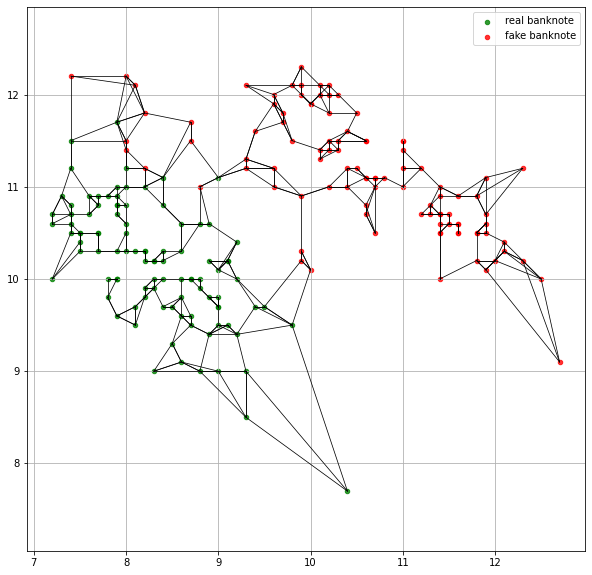

In [8]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.array(np.where(label==0))
#傳回符合label=0的index值
index_1 = np.array(np.where(label==1))
#傳回符合label=1的index值


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

#畫圖
plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],c="green",s=20, alpha=0.8)
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],c="red",s=20, alpha=0.8)
plt.legend(labels=["real banknote","fake banknote"],loc="upper right")
plt.grid()
plt.axis("equal")
        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
#呼叫函式，用 knn存回傳的值(距離點最近的k個點的座標)
knn = nearest_partition(dist_sq, K)

#連線，把data_xy裡的每一個點跟距離最近的 K個點(存在knn的座標)連起來，顏色是黑色，線的寬度為0.75
for i in range(len(knn)):
    for j in range(K):
        plt.plot(*zip(data_xy[i], knn[i][j]), color = 'black',linewidth=0.75)


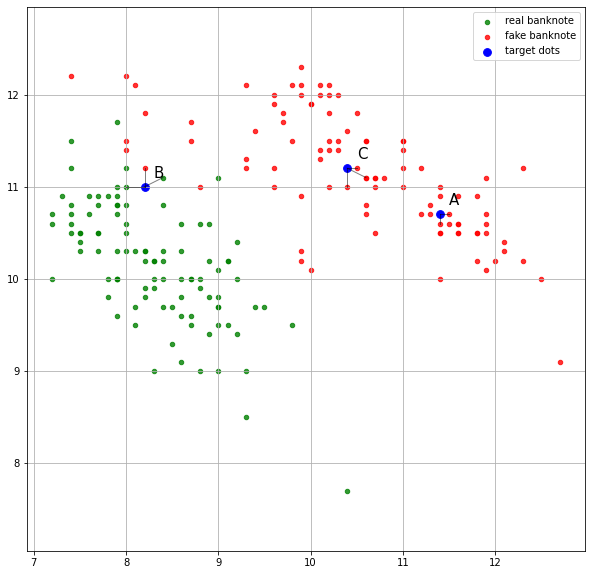

In [9]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']
#target存的值是index，所以再用targetpts存對應到index的座標點
targetpts = np.array(data_xy[target]) 

# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.array(np.where(label==0))
index_1 = np.array(np.where(label==1))


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

#畫圖
plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0,0],data_xy[index_0,1],c="green",s=20, alpha=0.8)
plt.scatter(data_xy[index_1,0],data_xy[index_1,1],c="red",s=20, alpha=0.8)
plt.grid()
plt.axis("equal")

# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here

#把targetpts裡的座標標上去，顏色為藍色
plt.scatter(targetpts[:,0],targetpts[:,1],s=60,c="blue") # Target dots
#圖例要新增一個"target dots"
plt.legend(labels=["real banknote","fake banknote","target dots"],loc="upper right")

#用一個words存A、B、C
words = ["A","B","C"]
#在target dots的旁邊加上文字，並設定字體大小
for i in range(len(targetpts)):
    plt.text(targetpts[i,0]+0.1,targetpts[i,1]+0.1,words[i],fontsize=15)

K = 3
knn1=[]
# knn 已經存了每個點距離最近的 K個點，所以只要用index(Target)去找距離最近的 K個點座標即可，append到 knn1裡面
for i in target:
    knn1.append(knn[i])
knn1 = np.array(knn1)
#連線，把targetpts裡的每一個點跟距離最近的 K個點(存在knn1的座標)連起來，顏色是黑色，線的寬度為1，alpha(透明度)為0.5
for i in range(len(knn1)):
    for j in range(K):
        plt.plot(*zip(targetpts[i], knn1[i][j]), color = 'black',linewidth=1, alpha=0.5)

### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：A跟C為fake banknote，離A跟C最近的三個點都是屬於fake banknote，B為real banknote，因為離B最近的三個點中，有兩個屬於real banknote

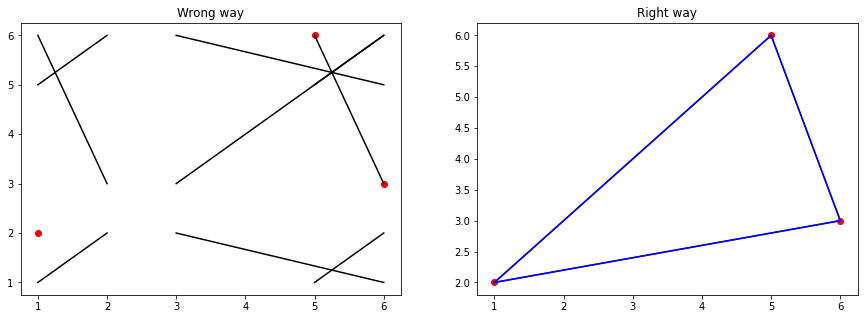

In [10]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')